<a href="https://colab.research.google.com/github/KanhaiyaKumarShukla/ML-Practice/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro

* Density-based spatial clustering of applications with noise.
* no need of predetermined no. of cluster.
* Outliers are data points that significantly differ from the rest of the observations in a dataset. Because of the outliers the center of clusters was shifted in k-mean.
* Can find clusters of arbitrary shapes. k-mean consider cluster as spherical.
* Parameters:
    * **eps** (epsilon): It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors.
    *  **MinPts** : Minimum number of neighbors (data points) within eps radius. In general, `MinPth >= D+1` where D = no. of dimensions of dataset. minimum value of MinPts is 3.


**Core Point** : A point is a core point if it has more than `MinPts` points within eps.

**Border Point**: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.

**Noise or outlier**: A point which is not a core point or border point.

density-connected points: Based on this principle DBSCAN make clusters.
   1. if `q` is a core point and `p` is neighbour of `q`, then `p` is in cluster of `q`.
   2. there is a chain of points p1, p2, ..., pn between `p` and `q` and each point in the chain satisfies first condition with its previous point, then they are in cluster.


### step by set algo:


0.   Estimate eps and MinPts.
1.   Identify the core points, Border Points and outlier.
2.   for each core point create a new cluster if it is not already assigned to cluster.
3.   Find recursively all its density-connected points and assign them to the same cluster as core point.
4.   Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.



In [2]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

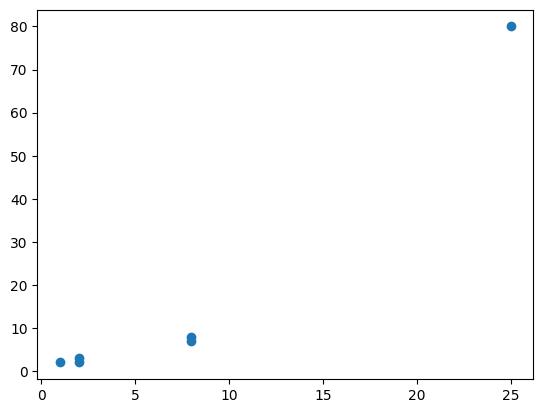

In [ ]:
X=np.array([[1,2], [2,2], [2, 3], [8, 7], [8, 8], [25, 80]])
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
db=DBSCAN(eps=3, min_samples=2)
db.fit(X)
db.labels_

array([ 0,  0,  0,  1,  1, -1])

In [ ]:
from sklearn.datasets import make_circles

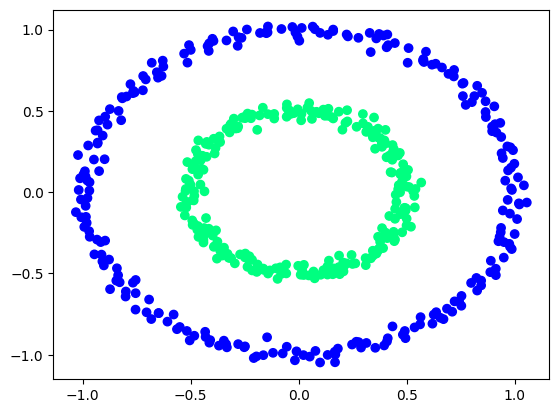

In [ ]:
X, y=make_circles(n_samples=500, factor=0.5, noise=0.03, random_state=4)

dbscan=DBSCAN(eps=0.1, min_samples=5)
clusters=dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='winter', marker='o')


In [3]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

**Standard deviation**: how spread out the data points are from the mean (average). A low standard deviation means that the data points tend to be close to the mean, while a high standard deviation indicates that the data points are spread out over a wider range.

In [4]:
X, y_true=make_blobs(n_samples=400, centers=4, cluster_std=0.50, random_state=0)

In [5]:
db=DBSCAN(eps=0.3, min_samples=10).fit(X)

In [6]:
db.core_sample_indices_

array([  3,   5,   6,   8,   9,  10,  14,  17,  18,  21,  23,  24,  35,
        36,  37,  38,  39,  40,  42,  45,  47,  48,  49,  50,  53,  54,
        57,  60,  61,  62,  64,  65,  66,  70,  71,  72,  73,  77,  81,
        83,  88,  89,  90,  91,  92,  95,  97,  98, 100, 101, 102, 106,
       109, 110, 111, 114, 117, 119, 125, 129, 130, 134, 136, 137, 139,
       143, 144, 146, 148, 149, 150, 151, 152, 154, 155, 156, 157, 159,
       160, 162, 163, 165, 167, 168, 173, 176, 177, 178, 185, 189, 190,
       191, 193, 194, 195, 196, 198, 200, 201, 202, 203, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222,
       226, 227, 228, 229, 230, 231, 237, 239, 240, 241, 242, 243, 245,
       246, 247, 248, 251, 252, 254, 257, 258, 260, 261, 262, 263, 265,
       266, 267, 269, 273, 277, 278, 279, 280, 281, 282, 284, 285, 286,
       287, 288, 289, 292, 293, 294, 296, 300, 303, 305, 308, 309, 310,
       311, 314, 316, 319, 320, 325, 329, 333, 340, 345, 346, 34

In [7]:
db.labels_

array([-1, -1, -1,  0, -1,  1,  2,  0,  3,  2,  1,  2, -1, -1,  3, -1, -1,
        2,  0,  3,  3,  3,  1,  0,  0, -1, -1, -1,  0, -1,  0,  0,  3, -1,
       -1,  1,  2,  0,  2,  0,  3,  1,  2, -1,  2,  1,  2,  2,  2,  1,  1,
        1, -1,  1,  1, -1,  0,  2, -1, -1,  2,  2,  2,  2,  0,  3,  2, -1,
       -1, -1,  3,  0,  3,  1, -1,  3, -1,  3, -1, -1, -1,  0,  2,  1, -1,
       -1, -1,  0,  3,  2,  3,  2,  0,  3, -1,  1, -1,  2,  2,  2,  1,  2,
        0,  0,  3,  1,  0,  1,  2,  3,  3,  3, -1,  3,  1,  2, -1,  3,  1,
        1, -1,  3, -1, -1,  0,  1,  2, -1,  2,  0,  1, -1,  1,  3,  0, -1,
        1,  0,  1,  3, -1,  3, -1,  1,  3, -1,  0,  3,  2,  3,  2,  0,  2,
       -1,  1,  3,  2,  3, -1,  3,  0, -1,  1,  3, -1,  1,  2,  2,  3,  1,
        1, -1, -1,  2, -1, -1,  0,  3,  0,  1, -1, -1,  3,  0,  1,  3,  1,
       -1, -1,  1,  0,  0, -1,  3,  1,  1,  1, -1,  2,  0,  0,  3,  2,  2,
        1,  0,  3,  1,  0,  1,  0,  0,  2,  2,  1,  2,  0, -1,  2,  1,  3,
        0,  1,  3, -1, -1

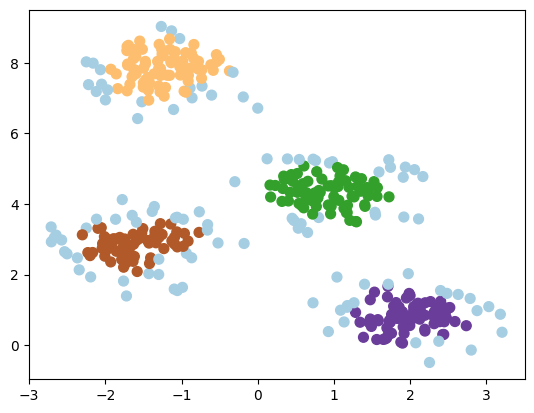

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='Paired', s=50)

Text(0.5, 1.0, 'number of clusters: 4')

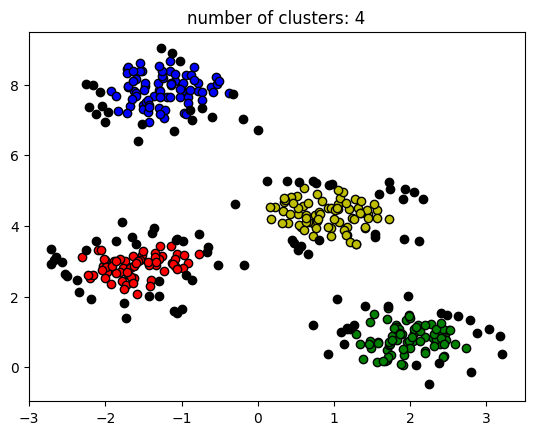

In [15]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True  # mask to filter the core point
labels = db.labels_   # all the cluster labels.

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'k']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)

In [17]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.41
Adjusted Rand Index: 0.58


In [19]:
from sklearn.datasets import make_moons  # make_moons generates a synthetic dataset with two moon-shaped clusters.

In [20]:
X, _ =make_moons(n_samples=300, noise=0.1)

In [21]:
dbscan=DBSCAN(eps=0.2, min_samples=5)

In [22]:
dbscan.fit(X)

DBSCAN(eps=0.2)

In [23]:
labels=dbscan.labels_

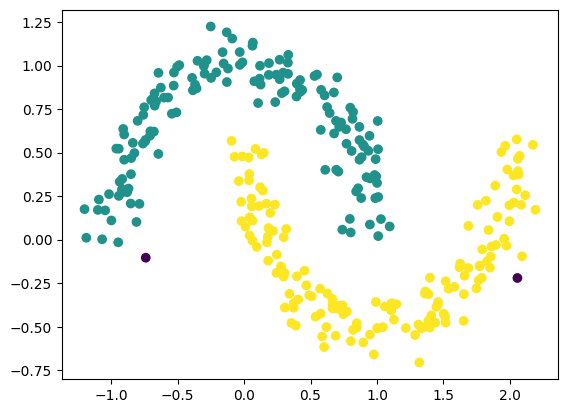

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=labels)